# Simple Linear Regression

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#FF5F5D', '#3F7C85', '#00CCBF', '#72F2EB', '#747E7E'])

# import warnings
# warnings.filterwarnings('ignore')

## Step 1: Data Preparation

In [ ]:
df = pd.read_csv('datasets/studentscores.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


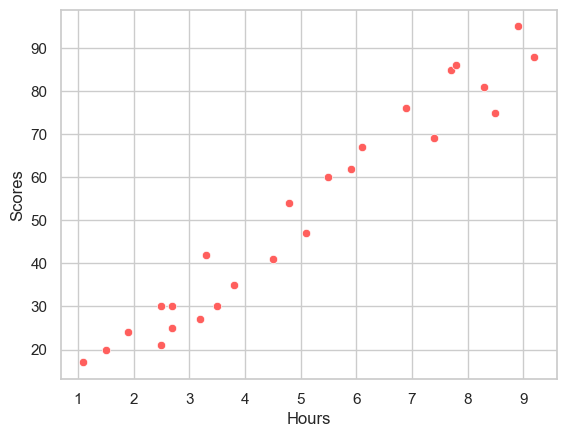

In [ ]:
sns.scatterplot(data=df, x="Hours", y="Scores");

In [ ]:
X = df.iloc[ : , : 1 ].values
Y = df.iloc[ : , 1 ].values

In [ ]:
print(f"{X.shape=}")
print(f"{Y.shape=}")

X.shape=(25, 1)
Y.shape=(25,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0)

In [ ]:
print(f"{X_train.shape=}")
print(f"{Y_train.shape=}")
print(f"{X_test.shape=}")
print(f"{Y_test.shape=}")

X_train.shape=(18, 1)
Y_train.shape=(18,)
X_test.shape=(7, 1)
Y_test.shape=(7,)


## Step 2: Fitting Simple Linear Regression Model to the training set

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [ ]:
regressor = regressor.fit(X_train, Y_train)

In [ ]:
print(f"{regressor.intercept_=}")
print(f"{regressor.coef_=}")

regressor.intercept_=1.932204253151646
regressor.coef_=array([9.94167834])


In [ ]:
xs = np.linspace(-1, X_train.max()+1, 2)

In [ ]:
xs

array([-1. , 10.2])

In [ ]:
ys = regressor.coef_ * xs + regressor.intercept_

In [ ]:
ys

array([ -8.00947409, 103.33732332])

In [ ]:
# X.squeeze()

<Axes: >

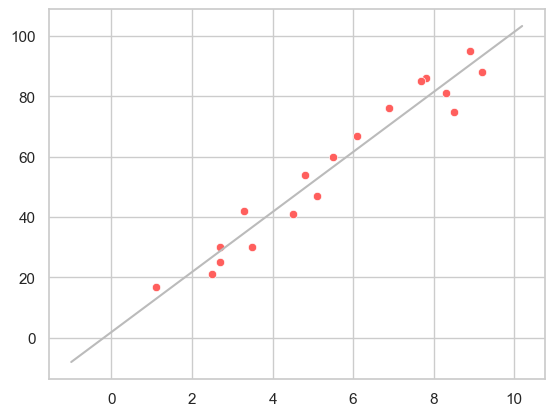

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x=X_train.squeeze(), y=Y_train, ax=ax)
sns.lineplot(x=xs, y=ys, color='#BBB', ax=ax)

## Step 3: Predecting the Result

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
Y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [ ]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [ ]:
regressor.predict([[6.6]])

array([67.54728129])

In [ ]:
X_t = np.squeeze(X_test)

In [ ]:
# np.concatenate((X_test.squeeze(), Y_pred, Y_test)).reshape(3,7).T

In [ ]:
P = pd.DataFrame.from_dict({'X':X_test.squeeze(), 'Yhat':Y_pred, 'Y':Y_test})

In [ ]:
P

,X,Yhat,Y
0,1.5,16.844722,20
1,3.2,33.745575,27
2,7.4,75.500624,69
3,2.5,26.786400,30
4,5.9,60.588106,62
5,3.8,39.710582,35
6,1.9,20.821393,24


<Axes: xlabel='X', ylabel='Y'>

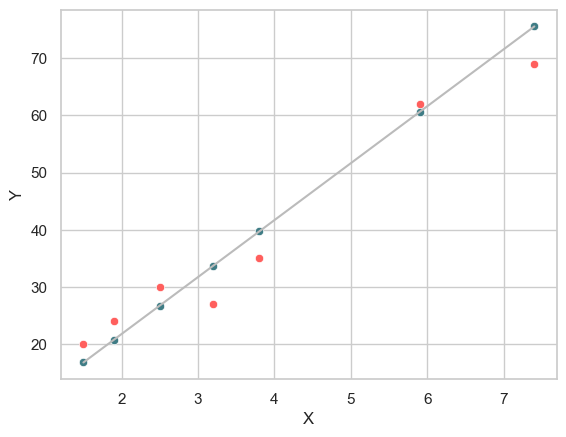

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x=P['X'], y=P['Y'], ax=ax)
sns.scatterplot(x=P['X'], y=P['Yhat'], ax=ax)
sns.lineplot(x=P['X'], y=P['Yhat'], color='#BBB', ax=ax)

## Step 4: Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print("R^2 : ", r2_score(Y_test, Y_pred))
print("MAE :", mean_absolute_error(Y_test, Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred)))

R^2 :  0.9367661043365055
MAE : 4.130879918502486
RMSE: 4.5092043283688055


## Step 5: Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(regressor, X, Y, cv=5)

print(f"{cv_results}")

[0.78626426 0.97891923 0.93182467 0.96604831 0.9273292 ]
